c:\Users\Kas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\Kas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\Kas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\Kas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\Kas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value enco

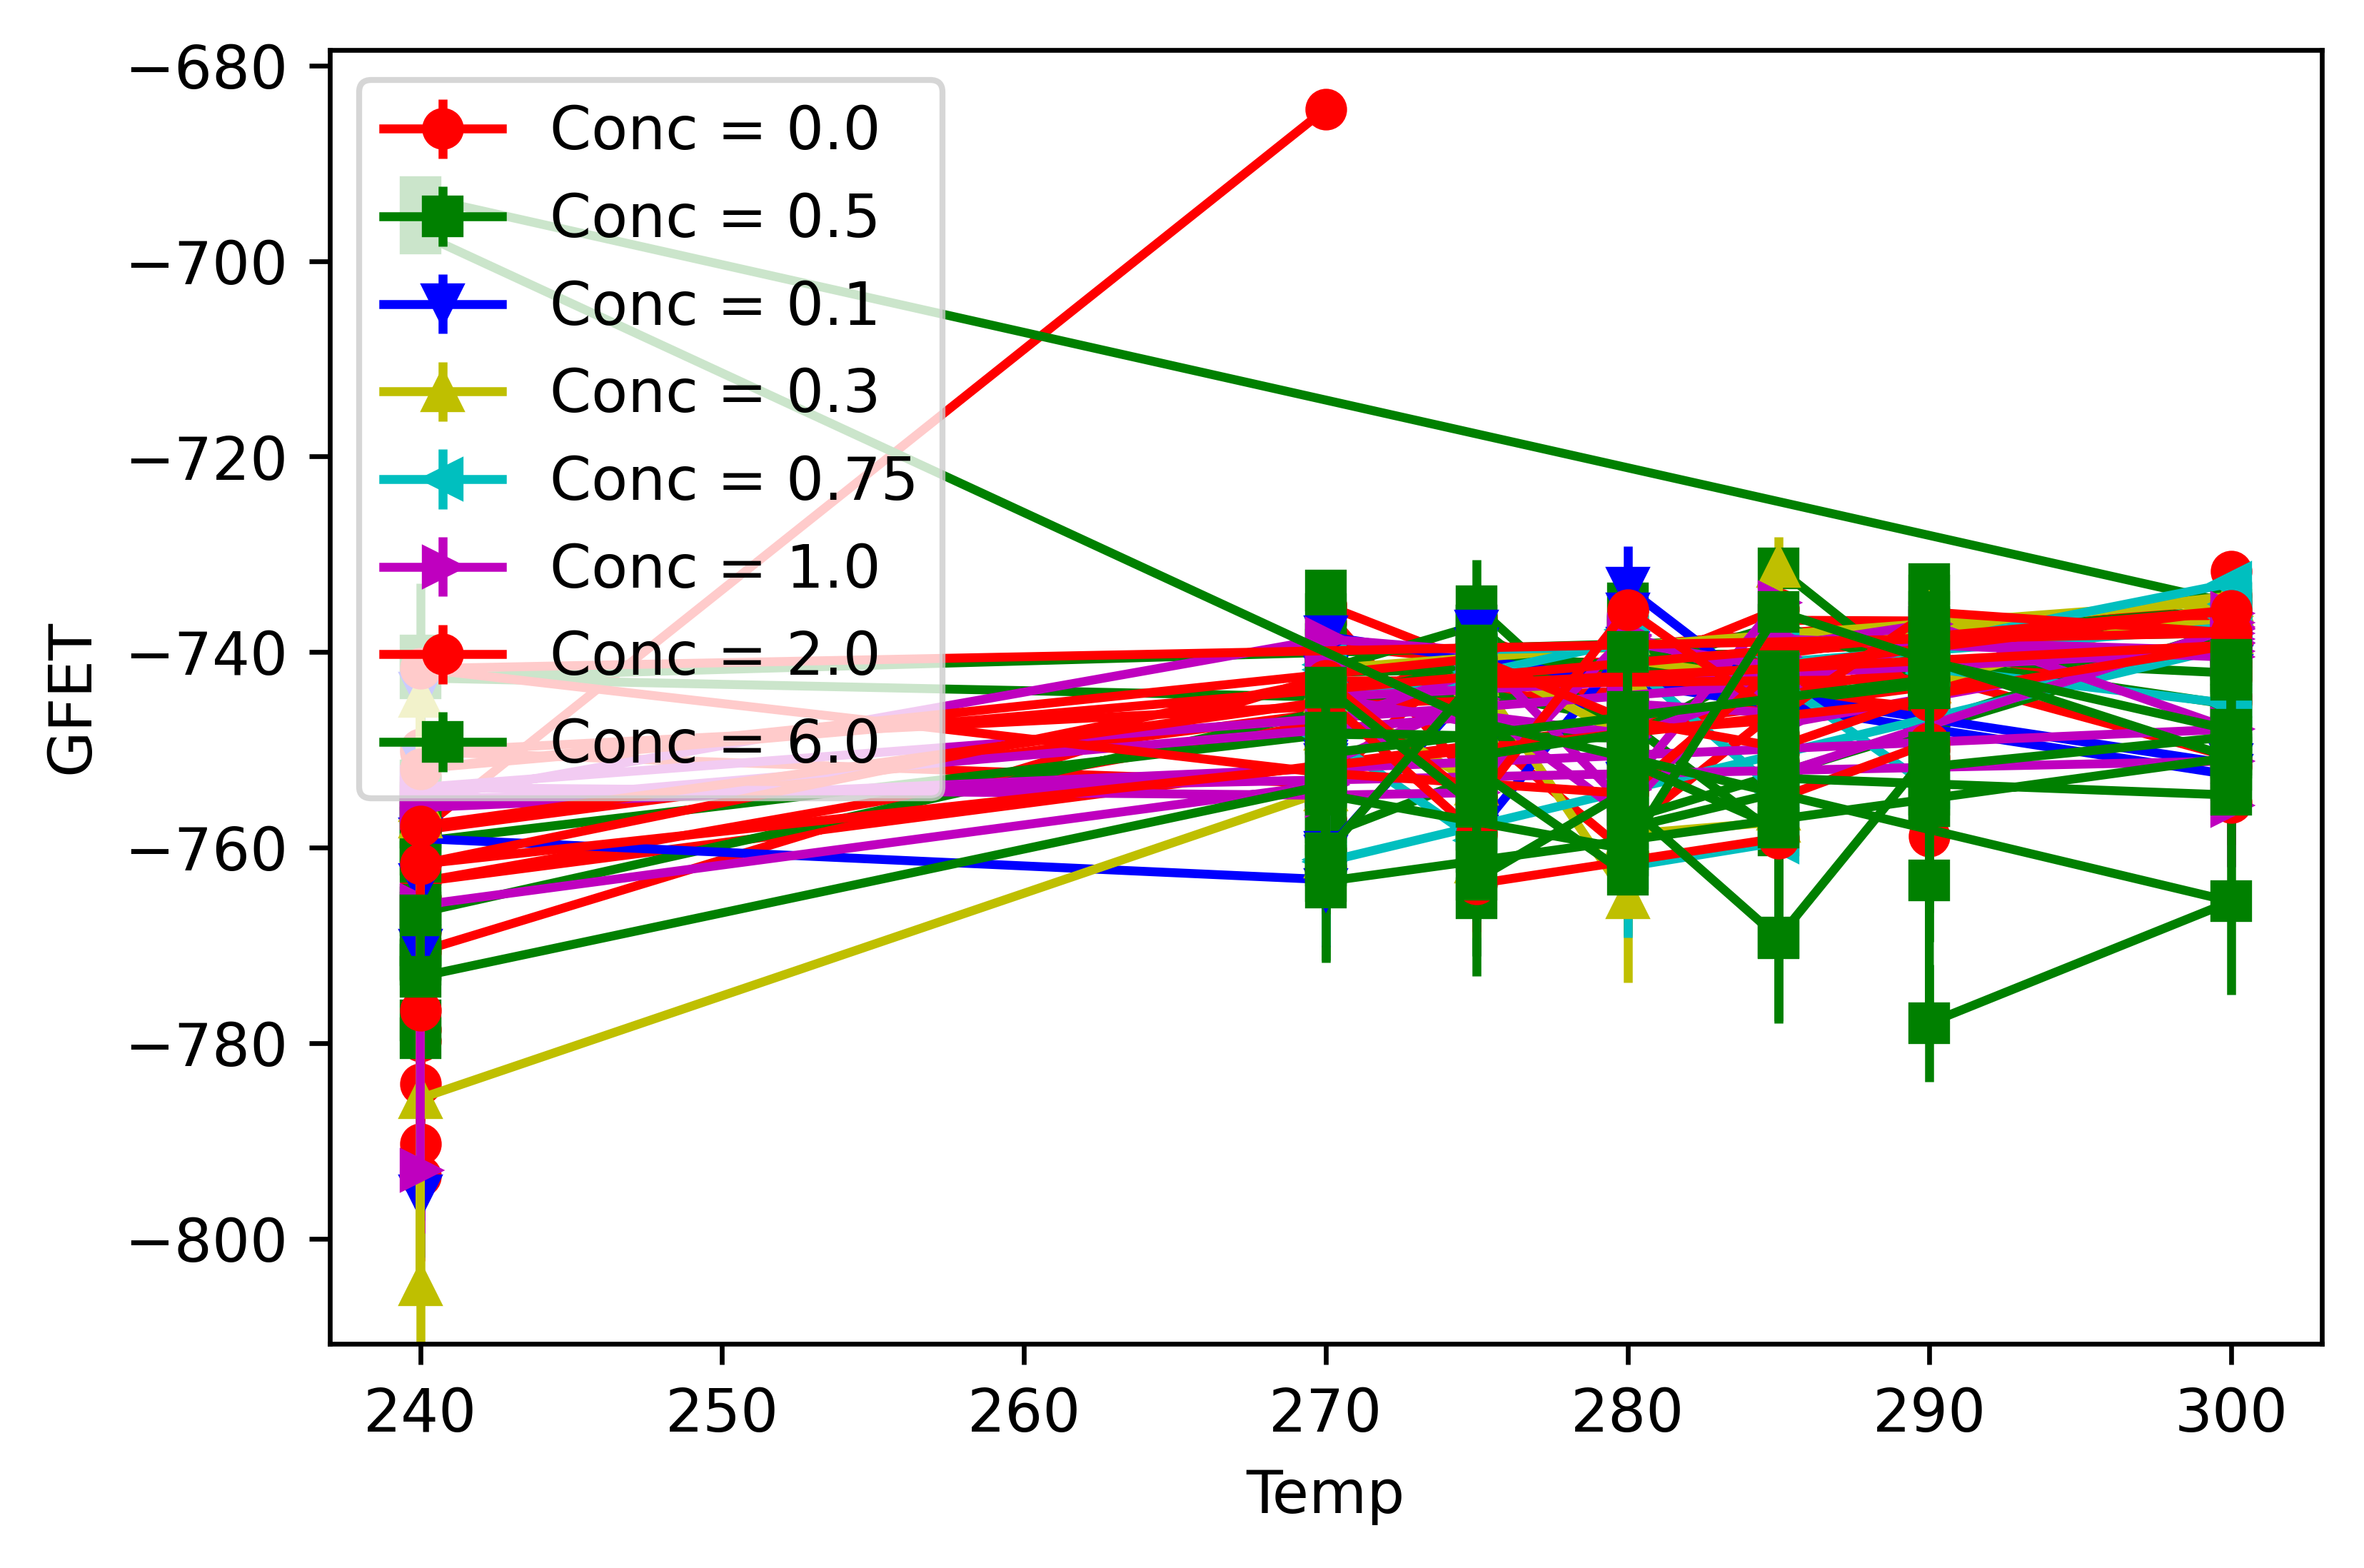

c:\Users\Kas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\Kas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


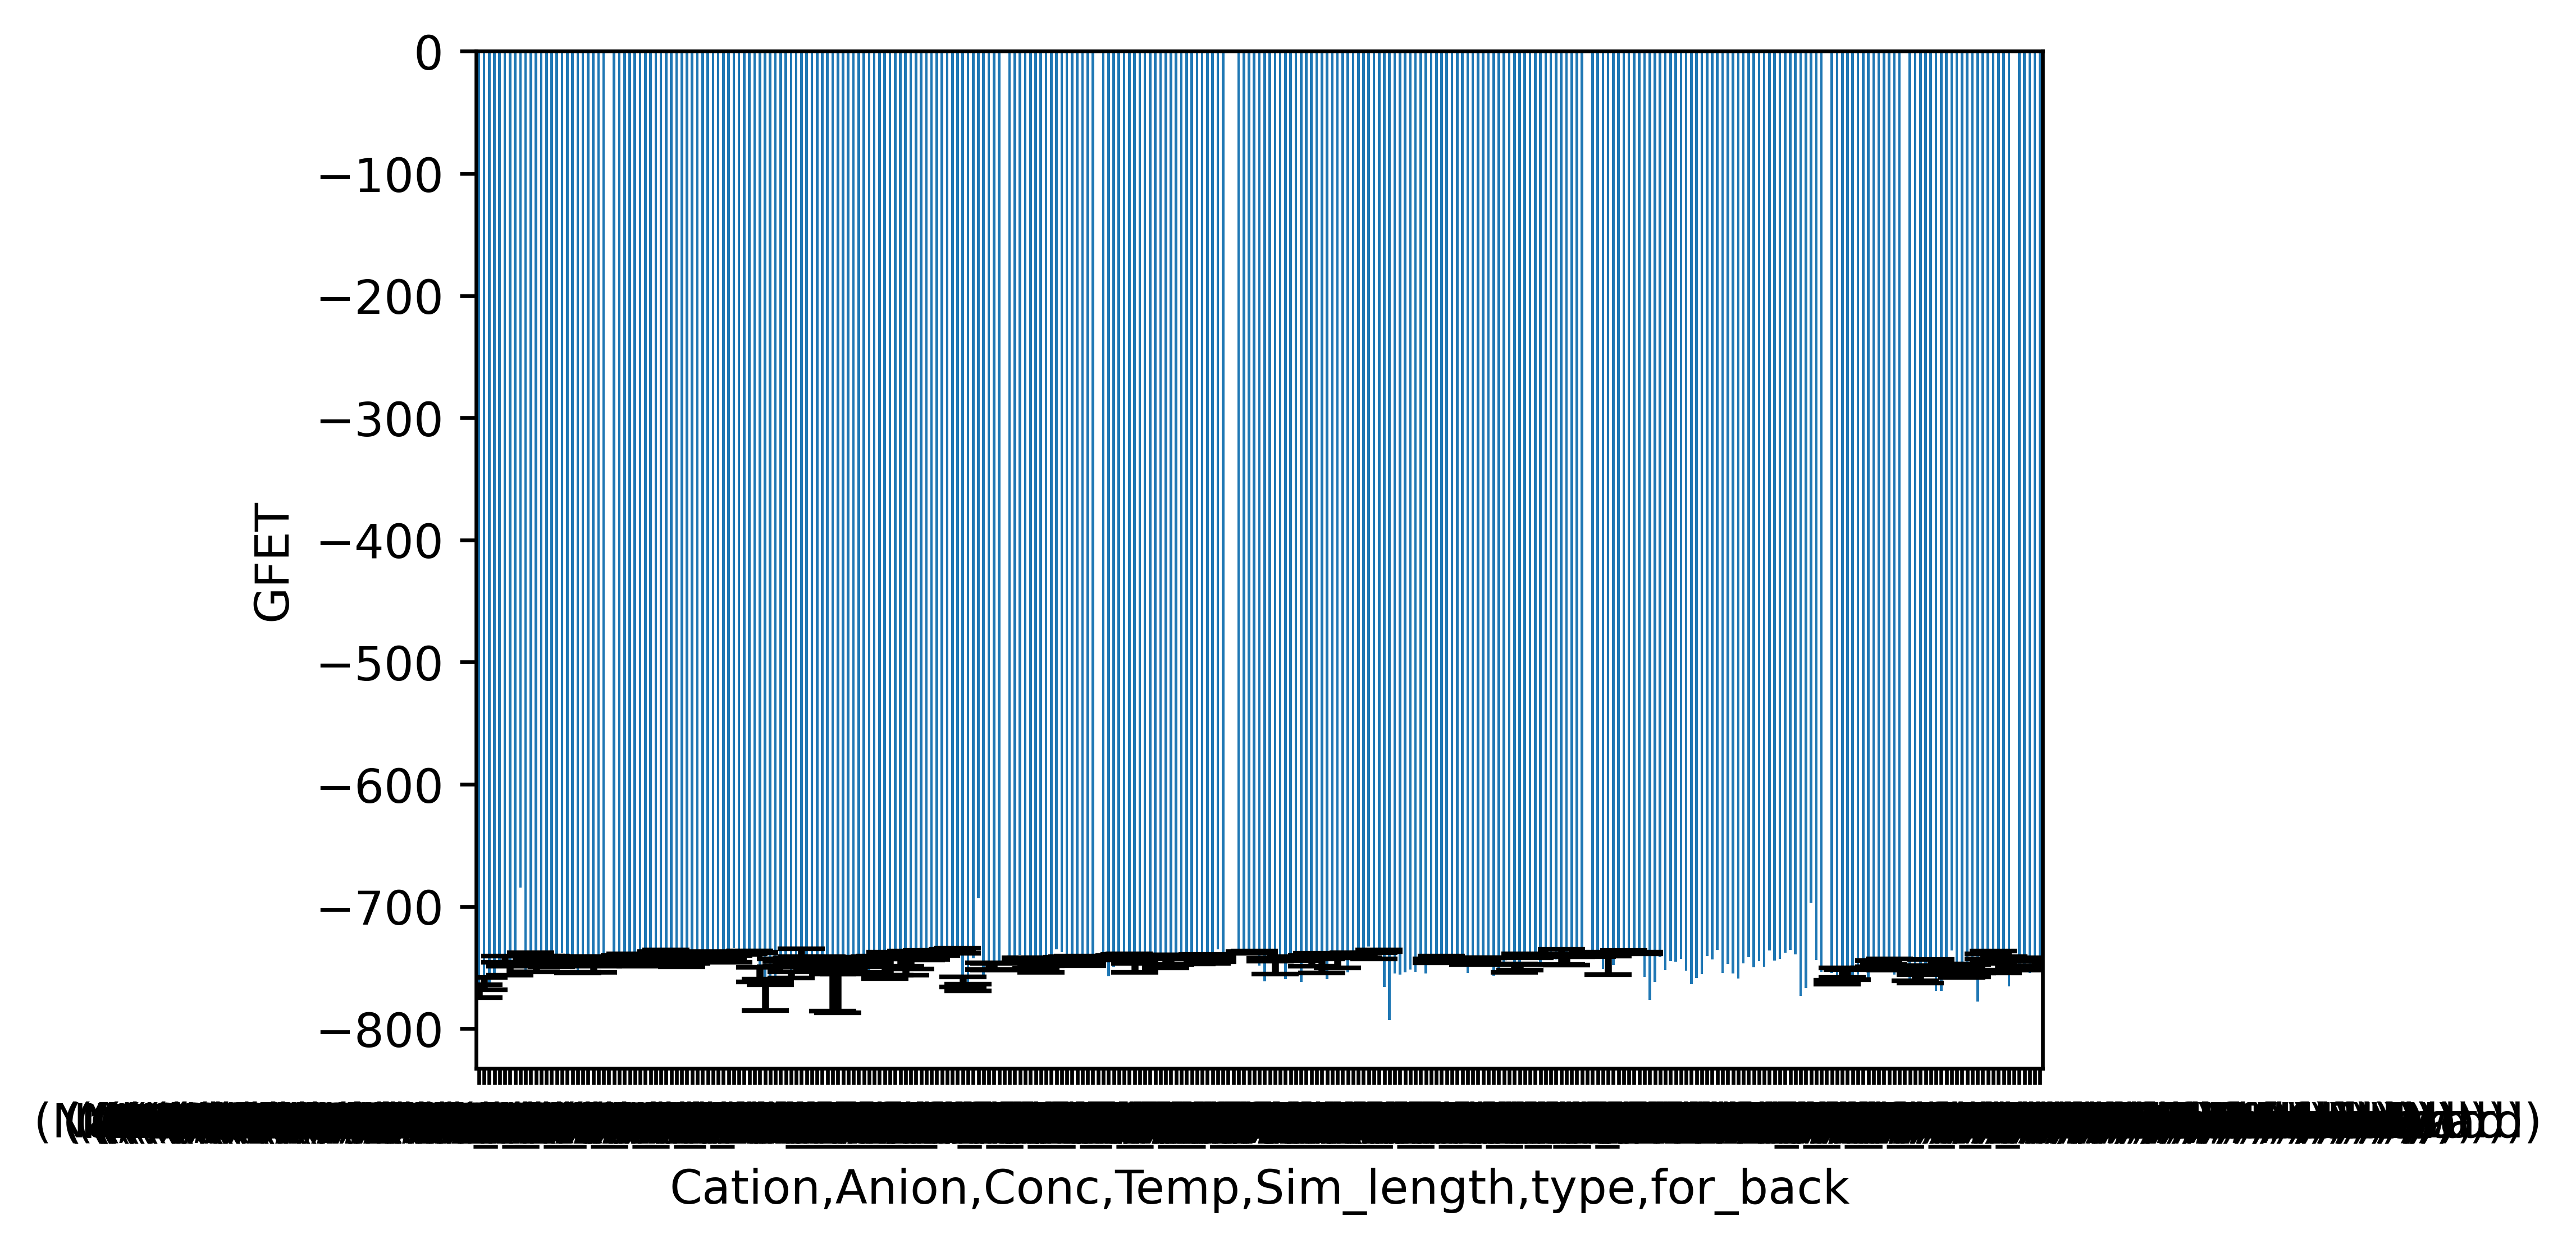

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['figure.dpi'] = 600

def filter_data(df, **filters):
    for key, value in filters.items():
        df = df[df[key] == value]
    return df

def plot_data(filename, x_column, y_column, y_error_column, hue_column, **filters):
    df = pd.read_excel(filename)
    df = filter_data(df, **filters)
    
    unique_hues = df[hue_column].unique()
    markers = ['o', 's', 'v', '^', '<', '>']
    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    for idx, hue in enumerate(unique_hues):
        subset = df[df[hue_column] == hue]
        plt.errorbar(subset[x_column], subset[y_column], yerr=subset[y_error_column],
                     label=f'{hue_column} = {hue}', linestyle='-', marker=markers[idx % len(markers)],
                     color=colors[idx % len(colors)])

    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

def plot_avg_data(filename, x_column, groupby_columns, y_column, **filters):
    df = pd.read_excel(filename)
    df = filter_data(df, **filters)
    
    grouped = df.groupby(groupby_columns)
    means = grouped[y_column].mean()
    sem = grouped[y_column].sem()

    means.plot(yerr=sem, kind='bar', capsize=5, rot=0)

    plt.ylabel(y_column)
    plt.show()

filename = r'C:\Users\Kas\OneDrive - Australian National University\Postdoctoral Fellowship\Corry Lab\Thermodiffusion\FEP_GROMACS_python2.xlsx'

# To plot with each concentration as a different line and temperature as the x-axis
plot_data(filename, 'Temp', 'GFET', 'GFETerr', 'Conc', Cation='Na', Anion='Cl')

# To plot with average GFET and standard error for specific filter
plot_avg_data(filename, 'Temp', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type', 'for_back'], 'GFET', Cation='Na', Anion='Cl')



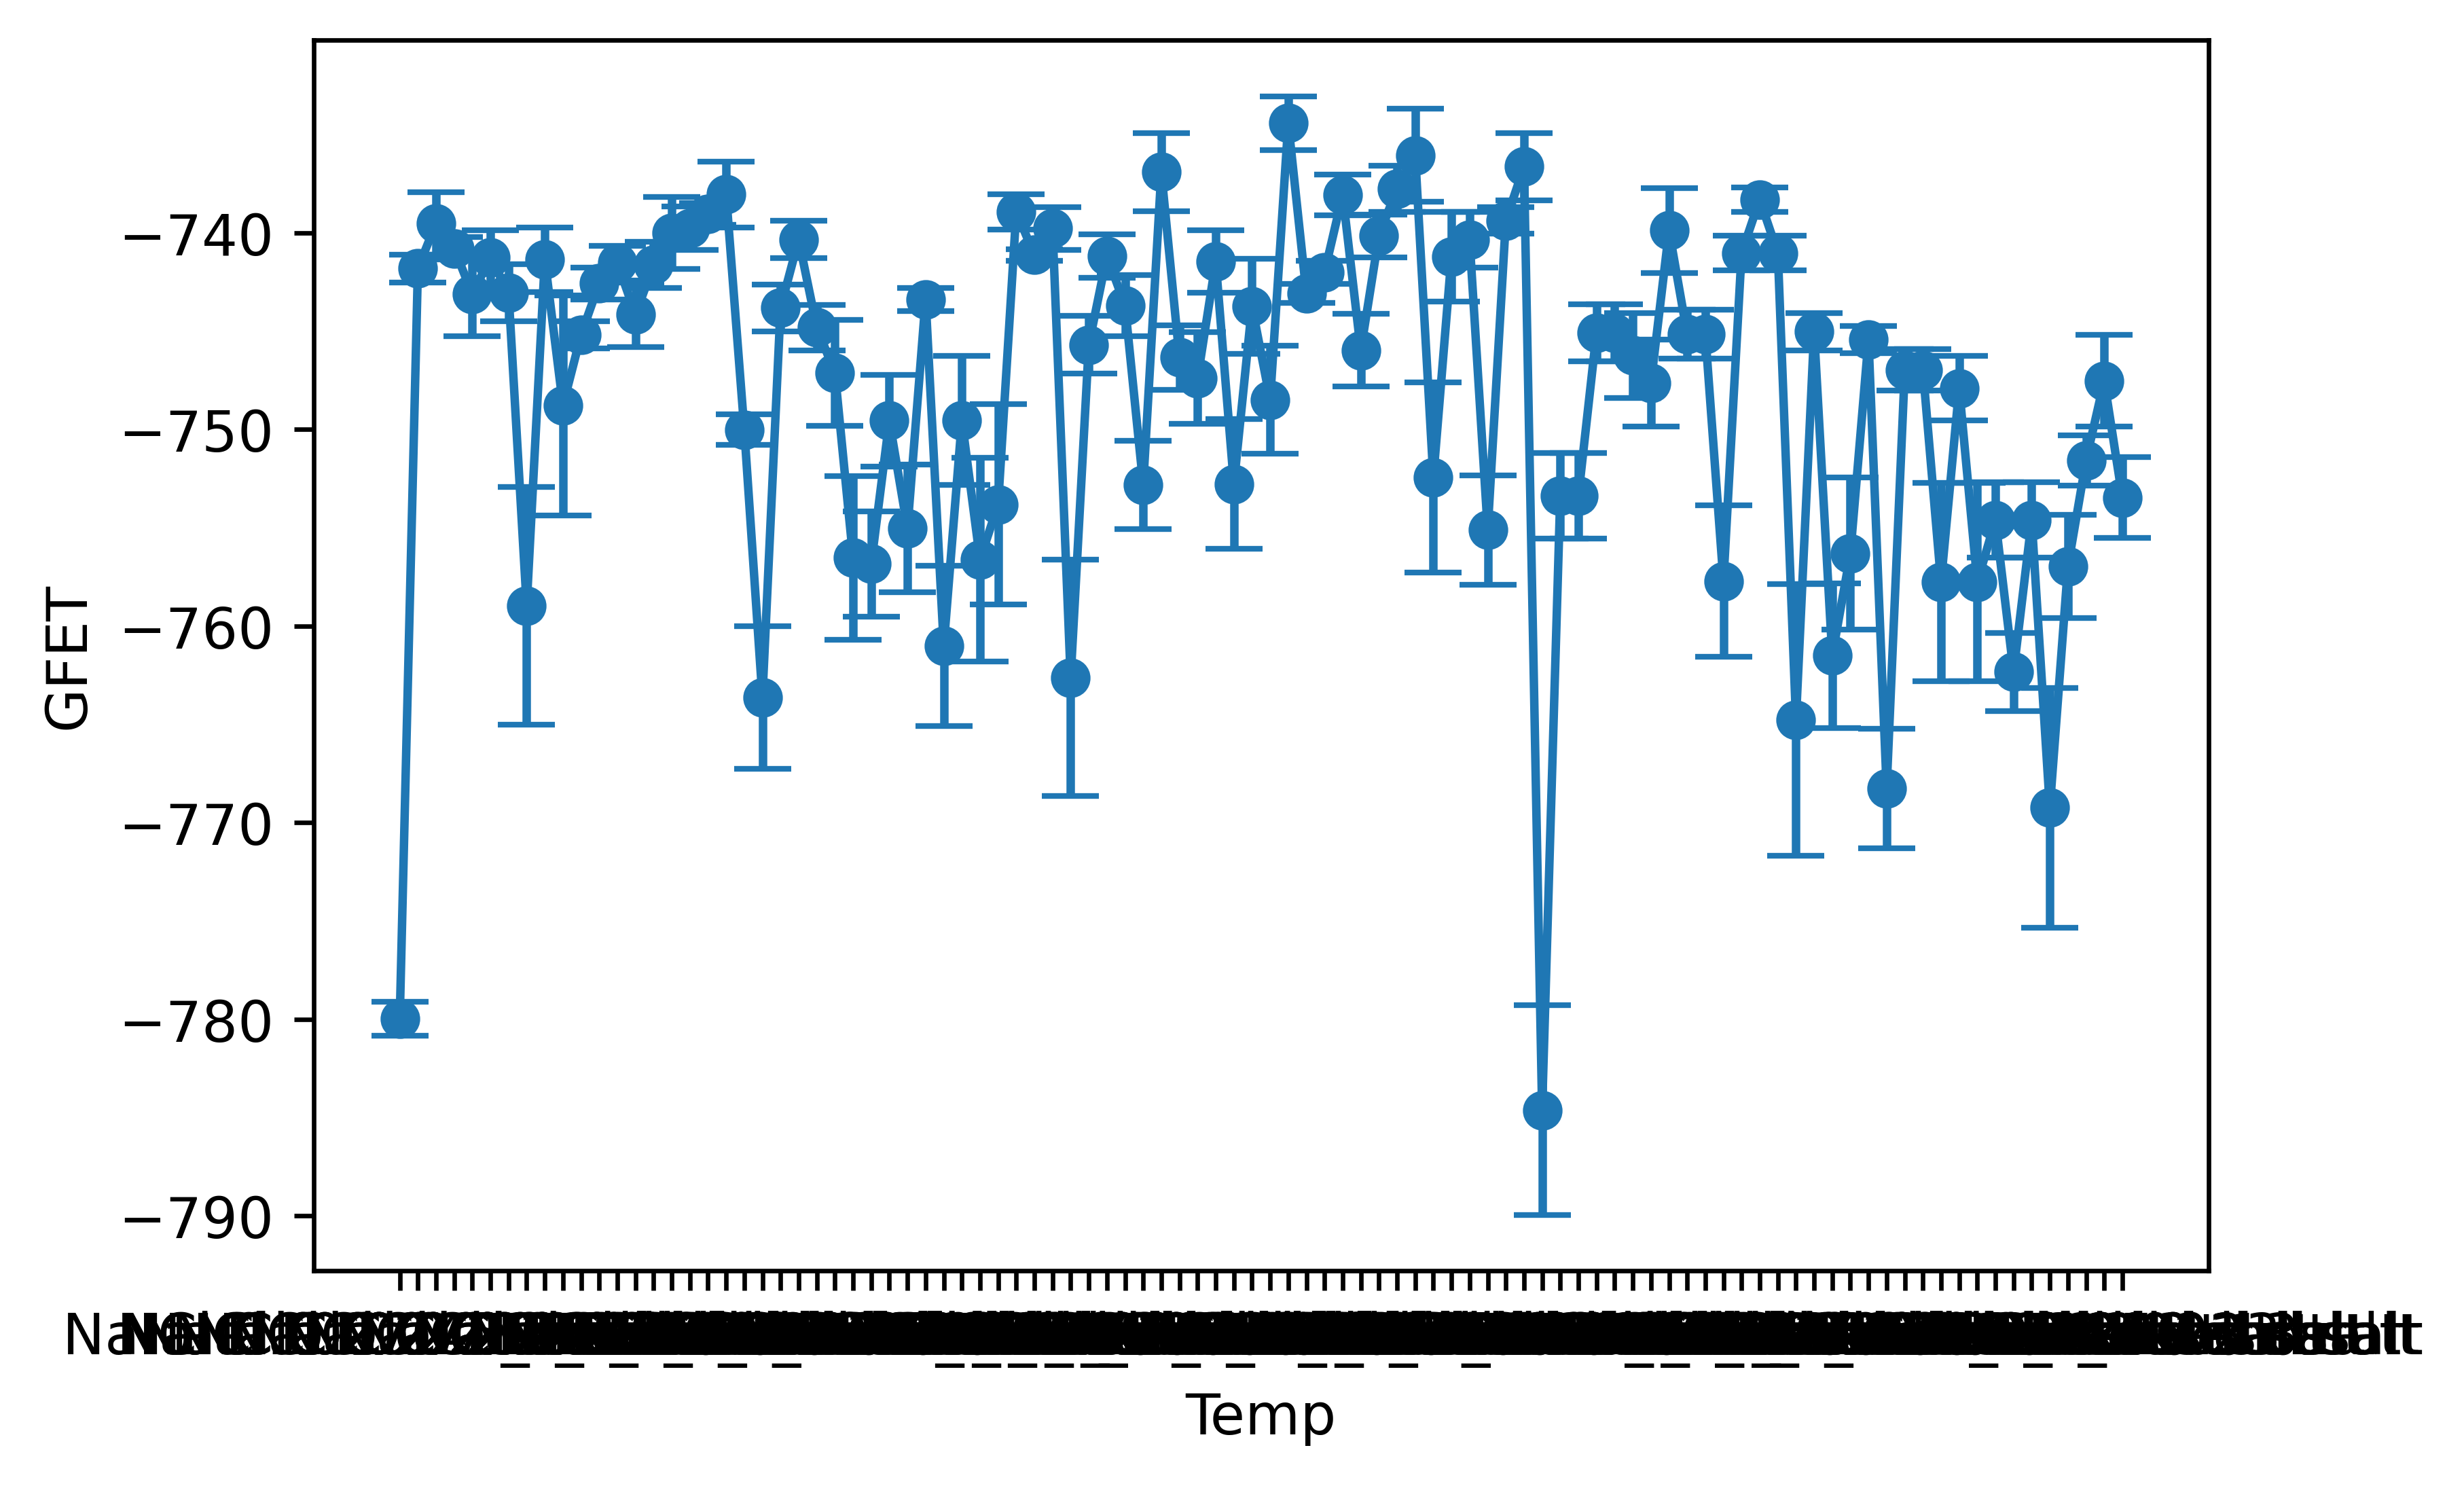

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def filter_data(df, **filters):
    for key, value in filters.items():
        df = df[df[key] == value]
    return df

def compute_weighted_avg_error(df):
    forward = df[df['for_back'] == 'forward']
    backward = df[df['for_back'] == 'backward']
    
    # check if both forward and backward values exist
    if not forward.empty and not backward.empty:
        gfet_1, gfeterr_1 = forward['GFET'].values[0], forward['GFETerr'].values[0]
        gfet_2, gfeterr_2 = backward['GFET'].values[0], backward['GFETerr'].values[0]

        weighted_avg = (gfet_1/gfeterr_1**2 + gfet_2/gfeterr_2**2) / (1/gfeterr_1**2 + 1/gfeterr_2**2)
        err_weighted_avg = np.sqrt(1 / (1/gfeterr_1**2 + 1/gfeterr_2**2))

        return weighted_avg, err_weighted_avg
    else:
        return None, None

def plot_weighted_avg_data(filename, x_column, groupby_columns, y_column, **filters):
    df = pd.read_excel(filename)
    df = filter_data(df, **filters)
    
    # Compute weighted average and errors for each group
    df_grouped = df.groupby(groupby_columns)
    averages = []
    errors = []
    x_values = []
    
    for name, group in df_grouped:
        avg, err = compute_weighted_avg_error(group)
        if avg is not None:
            averages.append(avg)
            errors.append(err)
            
            # Convert tuple name to string
            x_value = ' '.join(map(str, name)) if isinstance(name, tuple) else str(name)
            x_values.append(x_value)

    plt.errorbar(x_values, averages, yerr=errors, capsize=5, linestyle='-', marker='o')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()


    
filename = r'C:\Users\Kas\OneDrive - Australian National University\Postdoctoral Fellowship\Corry Lab\Thermodiffusion\FEP_GROMACS_python.xlsx'


# To plot with average GFET and standard error for specific filter
plot_weighted_avg_data(filename, 'Temp', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], 'GFET', Cation='Na', Anion='Cl')

ValueError: 'x' and 'y' must have the same size

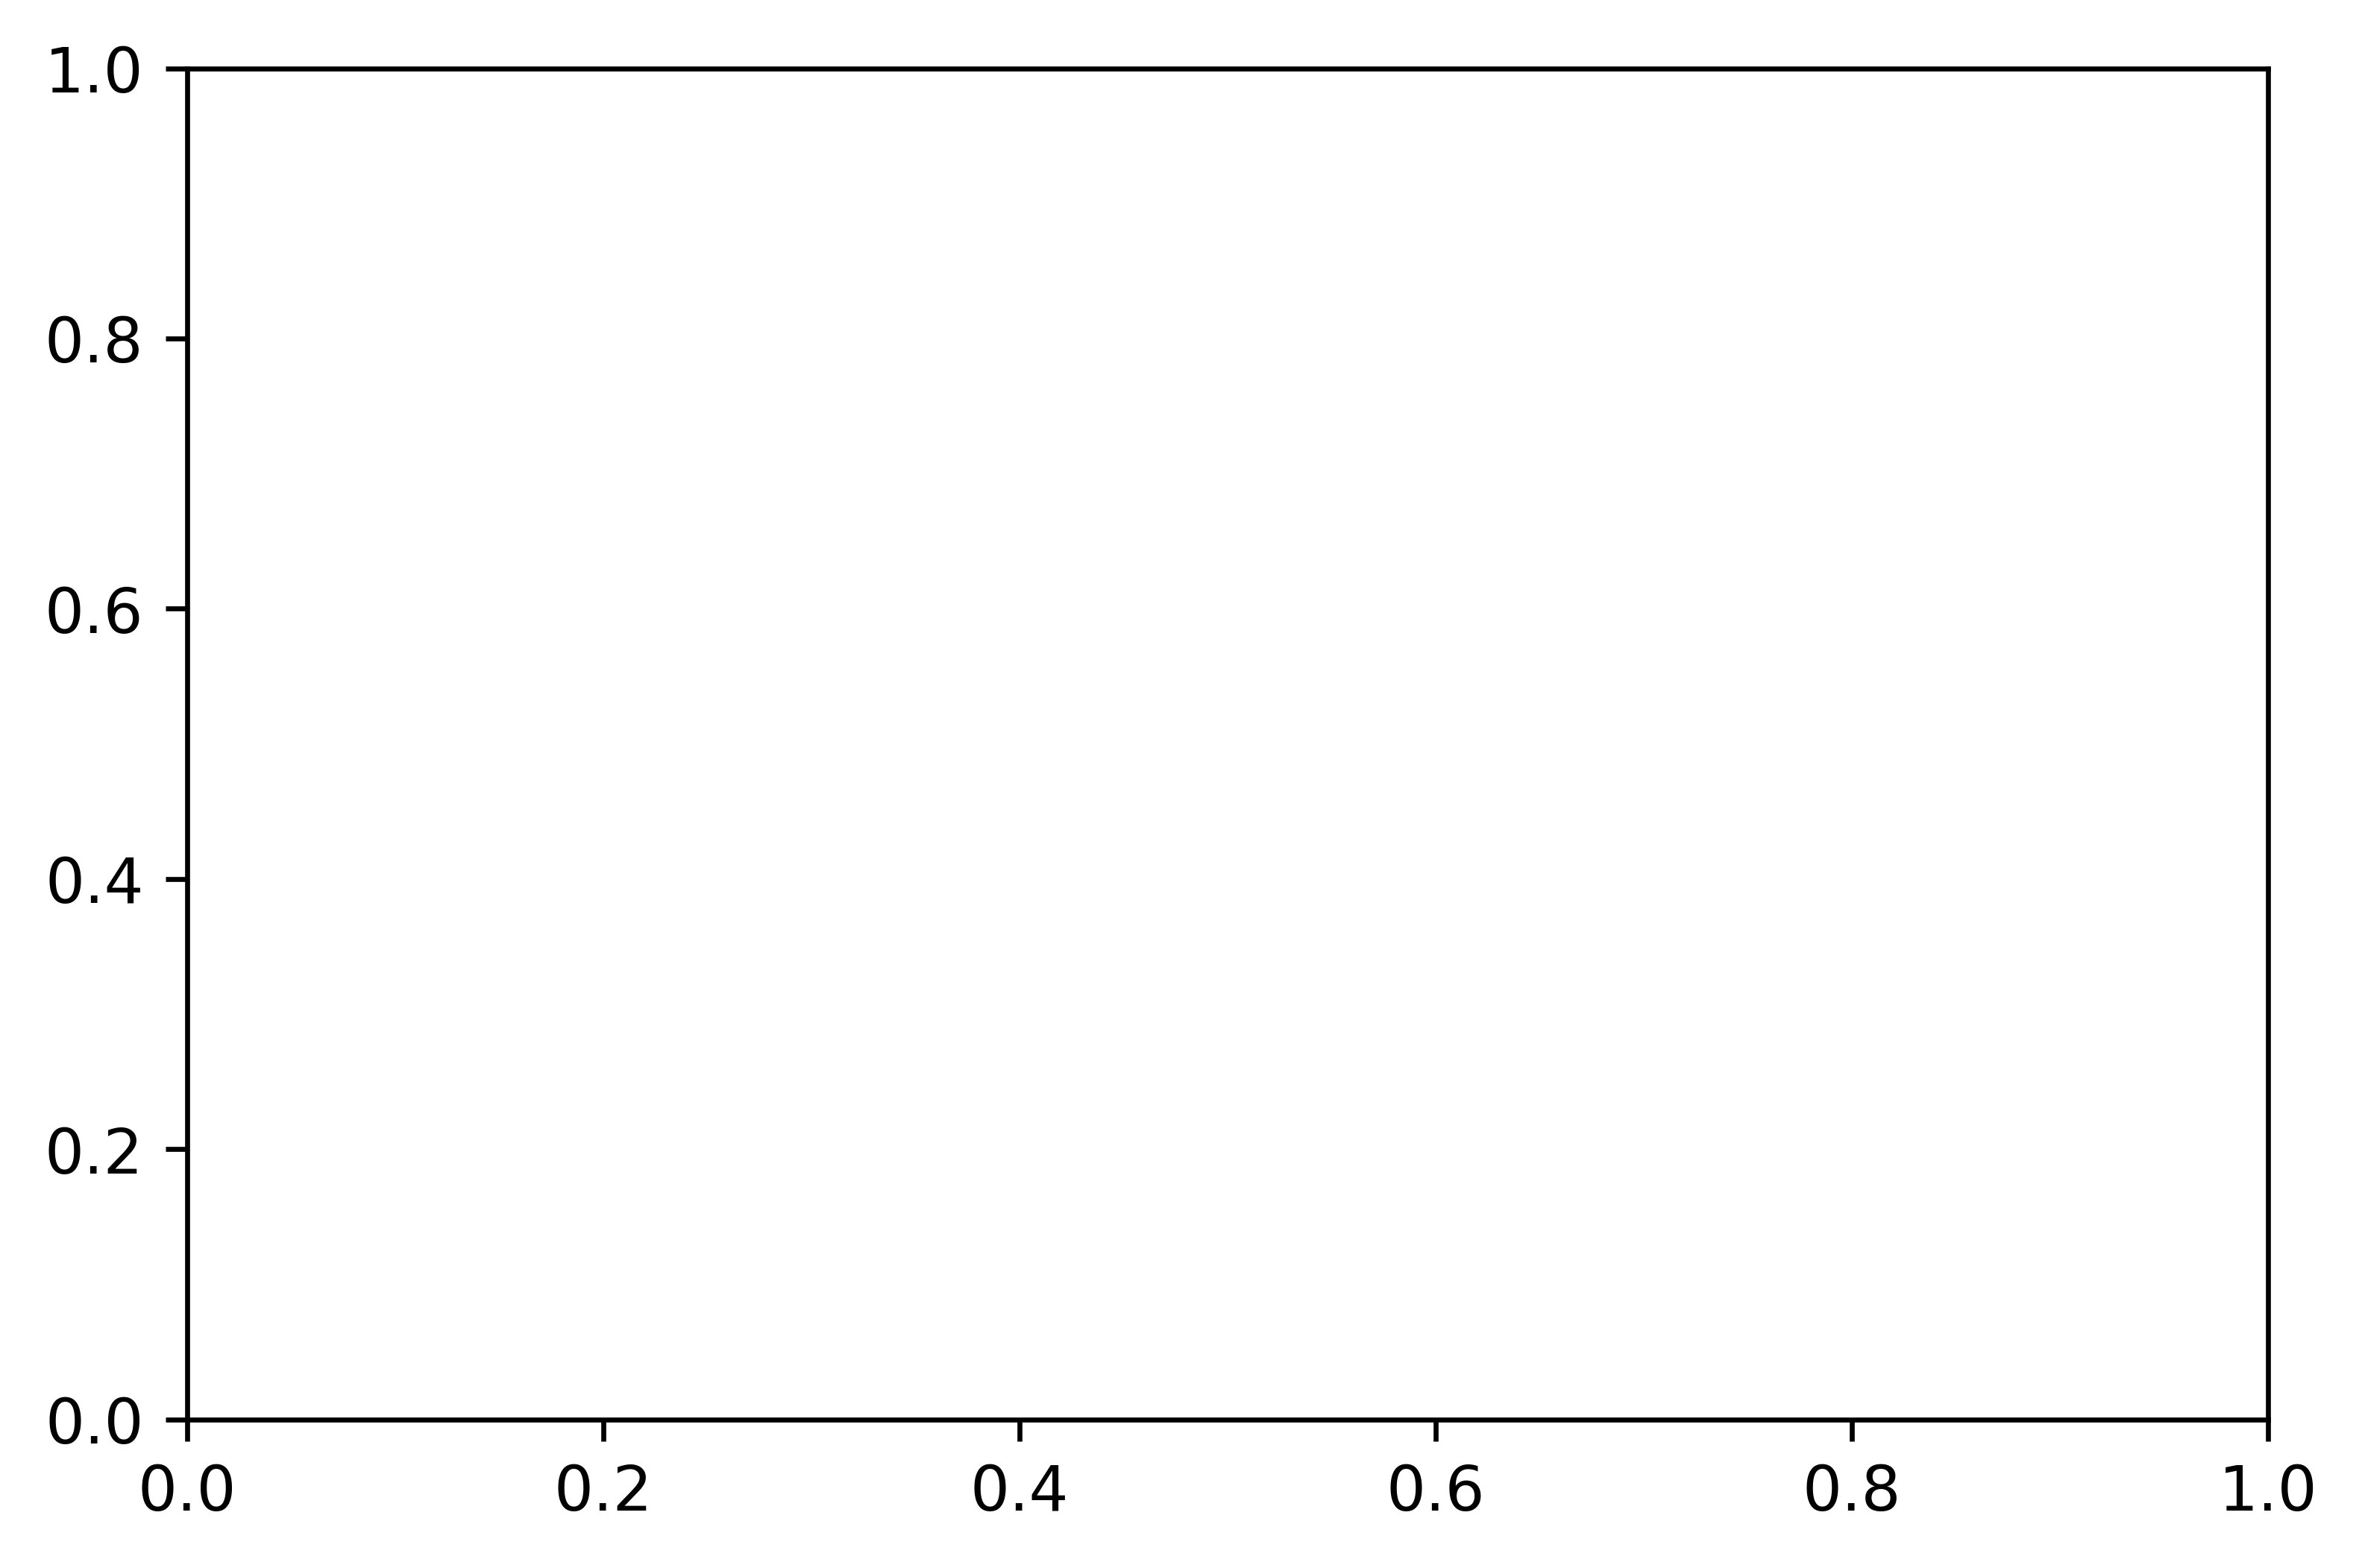

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def filter_data(df, **filters):
    for key, value in filters.items():
        df = df[df[key] == value]
    return df

def compute_weighted_avg_error(df):
    forward = df[df['for_back'] == 'forward']
    backward = df[df['for_back'] == 'backward']
    
    if not forward.empty and not backward.empty:
        gfet_1, gfeterr_1 = forward['GFET'].values[0], forward['GFETerr'].values[0]
        gfet_2, gfeterr_2 = backward['GFET'].values[0], backward['GFETerr'].values[0]

        if any(np.isnan([gfet_1, gfeterr_1, gfet_2, gfeterr_2])) or any(np.isinf([gfet_1, gfeterr_1, gfet_2, gfeterr_2])):
            return None, None

        weighted_avg = (gfet_1/gfeterr_1**2 + gfet_2/gfeterr_2**2) / (1/gfeterr_1**2 + 1/gfeterr_2**2)
        err_weighted_avg = np.sqrt(1 / (1/gfeterr_1**2 + 1/gfeterr_2**2))

        return weighted_avg, err_weighted_avg
    else:
        return None, None

def plot_data(filename, x_column, groupby_columns, y_column, **filters):
    df = pd.read_excel(filename)
    
    # Adjusting the temperature
    df['Temp'] = df['Temp'] - 273.15

    df = filter_data(df, **filters)
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(df['Conc'].unique())))
    temp_index = groupby_columns.index('Temp')
    
    for i, (conc, group) in enumerate(df.groupby('Conc')):
        df_grouped = group.groupby(groupby_columns)
        averages = []
        errors = []
        x_values = []
        for name, sub_group in df_grouped:
            avg, err = compute_weighted_avg_error(sub_group)
            if avg is not None:
                averages.append(avg)
                errors.append(err)
        #         x_values.append(name[temp_index])
        # if [ conc == 0 ]:
        #     plt.errorbar(x_values, averages, yerr=errors, color='black', capsize=5, linestyle='-', marker='o', label=f"Conc: {conc}")
        # if [ conc == 0.5 ]:
        #     plt.errorbar(x_values, averages, yerr=errors, color='red', capsize=5, linestyle='-', marker='o', label=f"Conc: {conc}")
        # else:
        plt.errorbar(x_values, averages, yerr=errors, color=colors[i], capsize=5, linestyle='-', marker='o', label=f"Conc: {conc}")

    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()


filename = r'C:\Users\Kas\OneDrive - Australian National University\Postdoctoral Fellowship\Corry Lab\Thermodiffusion\FEP_GROMACS_python.xlsx'

# To plot with average GFET and standard error for specific filter
plot_data(filename, 'Temp', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], 'GFET', Cation='Na', Anion='Cl')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def filter_data(df, **filters):
    for key, value in filters.items():
        df = df[df[key] == value]
    return df

def compute_weighted_avg_error_for_forback(sub_df,y_column):
    forward = sub_df[sub_df['for_back'] == 'forward']
    backward = sub_df[sub_df['for_back'] == 'backward']

    if not forward.empty and not backward.empty:
        gfet_1, gfeterr_1 = forward[y_column].values[0], forward[y_column + 'err'].values[0]
        gfet_2, gfeterr_2 = backward[y_column].values[0], backward[y_column + 'err'].values[0]

        if any(np.isnan([gfet_1, gfeterr_1, gfet_2, gfeterr_2])) or any(np.isinf([gfet_1, gfeterr_1, gfet_2, gfeterr_2])):
            return None, None

        weighted_avg = (gfet_1/gfeterr_1**2 + gfet_2/gfeterr_2**2) / (1/gfeterr_1**2 + 1/gfeterr_2**2)
        err_weighted_avg = np.sqrt(1 / (1/gfeterr_1**2 + 1/gfeterr_2**2))

        return weighted_avg, err_weighted_avg
    else:
        return None, None
    
def compute_avg_error_for_forback(sub_df,y_column):
    forward = sub_df[sub_df['for_back'] == 'forward']
    backward = sub_df[sub_df['for_back'] == 'backward']

    if not forward.empty and not backward.empty:
        gfet_1, gfeterr_1 = forward[y_column].values[0], forward[y_column + 'err'].values[0]
        gfet_2, gfeterr_2 = backward[y_column].values[0], backward[y_column + 'err'].values[0]

        if any(np.isnan([gfet_1, gfeterr_1, gfet_2, gfeterr_2])) or any(np.isinf([gfet_1, gfeterr_1, gfet_2, gfeterr_2])):
            return None, None

        avg= (gfet_1 + gfet_2)/2
        err_avg=np.sqrt(gfeterr_1**2 + gfeterr_2**2)
        # weighted_avg = (gfet_1/gfeterr_1**2 + gfet_2/gfeterr_2**2) / (1/gfeterr_1**2 + 1/gfeterr_2**2)
        # err_weighted_avg = np.sqrt(1 / (1/gfeterr_1**2 + 1/gfeterr_2**2))

        return avg, err_avg
    else:
        return None, None

def compute_weighted_avg_for_reps(rep_group,y_column):
    avgs = []
    errs = []

    for _, sub_group in rep_group.groupby('rep'):
        avg, err = compute_weighted_avg_error_for_forback(sub_group,y_column)
        if avg is not None:
            avgs.append(avg)
            errs.append(err)

    if avgs and errs:
        weighted_avg = sum(a/e**2 for a, e in zip(avgs, errs)) / sum(1/e**2 for e in errs)
        err_weighted_avg = np.sqrt(1 / sum(1/e**2 for e in errs))
        return weighted_avg, err_weighted_avg

    return None, None

def compute_avg_for_reps(rep_group,y_column):
    avgs = []
    errs = []

    for _, sub_group in rep_group.groupby('rep'):
        avg, err = compute_avg_error_for_forback(sub_group,y_column)
        if avg is not None:
            avgs.append(avg)
            errs.append(err)

    if avgs and errs:
        avg2 = np.mean(avgs)
        # err_avg = np.sqrt(sum([e**2 for e in errs]))
        non_zero_errs = [e for e in errs if e != 0]
        count_non_zero = len(non_zero_errs)

        if count_non_zero > 0:
            err_avg = np.sqrt(sum(e**2 for e in non_zero_errs)) / count_non_zero
        else:
            err_avg = None  # or whatever value you'd like to use when there are no non-zero elements
        
        if y_column in ['CN','MRT_fit'] :
            err_avg=np.std(avgs)
        return avg2, err_avg

    return None, None


def plot_data(filename, x_column, groupby_columns, y_column, **filters):
    df = pd.read_excel(filename)
    
    # Adjusting the temperature
    
    df = filter_data(df, **filters)
    df = df[df['Temp'] != 240]
    df = df[df['Conc'] != 6]
    df = df[df['Conc'] != 2]
    df = df[df['Conc'] != 1]
    df = df[df['Conc'] != 0.75]
    df = df[df['Conc'] != 0.3]
    df = df[df['Conc'] != 0.1]
    # df = df[df['Conc'] != 0.5]
    df = df[df['Sim_length'] == '2_extend']
    print(df)
    
    df['Temp'] = round((df['Temp'] - 273.15), 2)

    # Adjust the figure size here
    plt.figure(figsize=(10, 6))
    
    line_group = 'Temp' if x_column == 'Conc' else 'Conc'
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(df[line_group].unique())))
    x_index = groupby_columns.index(x_column)
    
    for i, (value, group) in enumerate(df.groupby(line_group)):
        df_grouped = group.groupby(groupby_columns)
        averages = []
        errors = []
        x_values = []
        
        for name, sub_group in df_grouped:
            # avg, err = compute_weighted_avg_for_reps(sub_group,y_column)
            avg, err = compute_avg_for_reps(sub_group,y_column)
            if avg is not None:
                averages.append(avg)
                errors.append(err)
                x_values.append(name[x_index])
        # print(value)
        if (value == 0.0 and line_group == 'Conc') or (value == 11.85 and line_group == 'Temp'):
            # print(value)
            # plt.errorbar(x_values, averages, yerr=errors, color='black', capsize=5, linestyle='-', marker='o', label=f"{line_group}: {value}")
            plt.errorbar(x_values, averages, yerr=errors, color=colors[i], capsize=5, linewidth=5, linestyle='-', marker='o', label=f"{line_group}: {value}")
        elif value == 0.5 and line_group == 'Conc':
            # plt.errorbar(x_values, averages, yerr=errors, color='red', capsize=5, linestyle='-', marker='o', label=f"{line_group}: {value}")
            plt.errorbar(x_values, averages, yerr=errors, color=colors[i], capsize=5, linewidth=5, linestyle='-', marker='o', label=f"{line_group}: {value}")
        else:
            plt.errorbar(x_values, averages, yerr=errors, color=colors[i], capsize=5, linestyle='-', marker='o', label=f"{line_group}: {value}")

    if x_column == 'Temp':
        x_label='Temperature (°C)'
    elif x_column == 'Conc':
        x_label='Concentration (M)'
    else:
        x_label=x_column
    
    if y_column == 'GFET':
        y_label='ΔG (kJ⋅mol$^{{-1}}$)'
    elif y_column == 'Avg_S':
        y_label='ΔS (kJ⋅mol$^{{-1}}$)'
    else:
        y_label=y_column


    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()



filename = r'C:\Users\Kas\OneDrive - Australian National University\Postdoctoral Fellowship\Corry Lab\Thermodiffusion\FEP_GROMACS_python3.xlsx'

for i in ['GFET','Avg_S','CN','MRT_fit']:
    # To plot with average GFET and standard error for specific filter with Temp as x-axis
    plot_data(filename, 'Temp', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], i, Cation='Li', Anion='Cl')

    # To plot with average GFET and standard error for specific filter with Conc as x-axis
    plot_data(filename, 'Conc', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], i, Cation='Li', Anion='Cl')

# # To plot with average GFET and standard error for specific filter with Conc as x-axis
# plot_data(filename, 'Conc', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], 'CN', Cation='Na', Anion='Cl')
# plot_data(filename, 'Conc', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], 'MRT_fit', Cation='Na', Anion='Cl')



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def filter_data(df, **filters):
    for key, value in filters.items():
        df = df[df[key] == value]
    return df

def compute_weighted_avg_error_for_forback(sub_df):
    forward = sub_df[sub_df['for_back'] == 'forward']
    backward = sub_df[sub_df['for_back'] == 'backward']

    if not forward.empty and not backward.empty:
        gfet_1, gfeterr_1 = forward['Avg_S'].values[0], forward['Avg_Serr'].values[0]
        gfet_2, gfeterr_2 = backward['Avg_S'].values[0], backward['Avg_Serr'].values[0]

        if any(np.isnan([gfet_1, gfeterr_1, gfet_2, gfeterr_2])) or any(np.isinf([gfet_1, gfeterr_1, gfet_2, gfeterr_2])):
            return None, None

        weighted_avg = (gfet_1/gfeterr_1**2 + gfet_2/gfeterr_2**2) / (1/gfeterr_1**2 + 1/gfeterr_2**2)
        err_weighted_avg = np.sqrt(1 / (1/gfeterr_1**2 + 1/gfeterr_2**2))

        return weighted_avg, err_weighted_avg
    else:
        return None, None

def compute_weighted_avg_for_reps(rep_group):
    avgs = []
    errs = []

    for _, sub_group in rep_group.groupby('rep'):
        avg, err = compute_weighted_avg_error_for_forback(sub_group)
        if avg is not None:
            avgs.append(avg)
            errs.append(err)

    if avgs and errs:
        weighted_avg = sum(a/e**2 for a, e in zip(avgs, errs)) / sum(1/e**2 for e in errs)
        err_weighted_avg = np.sqrt(1 / sum(1/e**2 for e in errs))
        return weighted_avg, err_weighted_avg

    return None, None


def plot_data(filename, x_column, groupby_columns, y_column, **filters):
    df = pd.read_excel(filename)
    
    # Adjusting the temperature
    df['Temp'] = round((df['Temp'] - 273.15), 2)
    df = filter_data(df, **filters)
    # df = df[df['Conc'] != 6]
    df = df[df['Sim_length'] == 2]

    # Adjust the figure size here
    plt.figure(figsize=(10, 6))
    
    line_group = 'Temp' if x_column == 'Conc' else 'Conc'
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(df[line_group].unique())))
    x_index = groupby_columns.index(x_column)
    
    for i, (value, group) in enumerate(df.groupby(line_group)):
        df_grouped = group.groupby(groupby_columns)
        averages = []
        errors = []
        x_values = []
        
        for name, sub_group in df_grouped:
            avg, err = compute_weighted_avg_for_reps(sub_group)
            if avg is not None:
                averages.append(avg)
                errors.append(err)
                x_values.append(name[x_index])

        plt.errorbar(x_values, averages, yerr=errors, color=colors[i], capsize=5, linestyle='-', marker='o', label=f"{line_group}: {value}")

    # print(x_column)
    if x_column == 'Temp':
        x_label='Temperature (°C)'
    elif x_column == 'Conc':
        x_label='Concentration (M)'
    else:
        x_label=x_column
    
    if y_column == 'Avg_S':
        y_label='ΔS (kJ⋅mol$^{{-1}}$) - converted from kT'
    else:
        y_label=y_column

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()


filename = r'C:\Users\Kas\OneDrive - Australian National University\Postdoctoral Fellowship\Corry Lab\Thermodiffusion\FEP_GROMACS_python.xlsx'

# To plot with average GFET and standard error for specific filter with Temp as x-axis
plot_data(filename, 'Temp', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], 'Avg_S', Cation='Na', Anion='Cl')

# To plot with average GFET and standard error for specific filter with Conc as x-axis
plot_data(filename, 'Conc', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], 'Avg_S', Cation='Na', Anion='Cl')



     Cation Anion  Conc   Temp Sim_length    type  for_back  rep    GFET  \
0        Li    Cl   0.0  240.0         10  cation   forward  1.0 -480.93   
1        Li    Cl   0.0  270.0         10  cation   forward  1.0 -477.05   
2        Li    Cl   0.0  280.0         10  cation   forward  1.0 -476.08   
3        Li    Cl   0.0  300.0         10  cation   forward  1.0 -473.48   
8        Na    Cl   0.0  240.0         10  cation   forward  1.0 -373.09   
...     ...   ...   ...    ...        ...     ...       ...  ...     ...   
1144     Na    Cl   0.0  300.0   2_extend  cation  backward  1.0 -367.13   
1145     Na    Cl   0.0  320.0   2_extend  cation   forward  1.0 -365.87   
1146     Na    Cl   0.0  320.0   2_extend  cation  backward  1.0 -365.83   
1147     Na    Cl   0.0  370.0   2_extend  cation   forward  1.0 -361.65   
1148     Na    Cl   0.0  370.0   2_extend  cation  backward  1.0 -361.80   

      GFETerr  ...  CNerr  MRT_fiterr      Avg_S  Avg_Serr AVG STDEV STDERR  \
0       

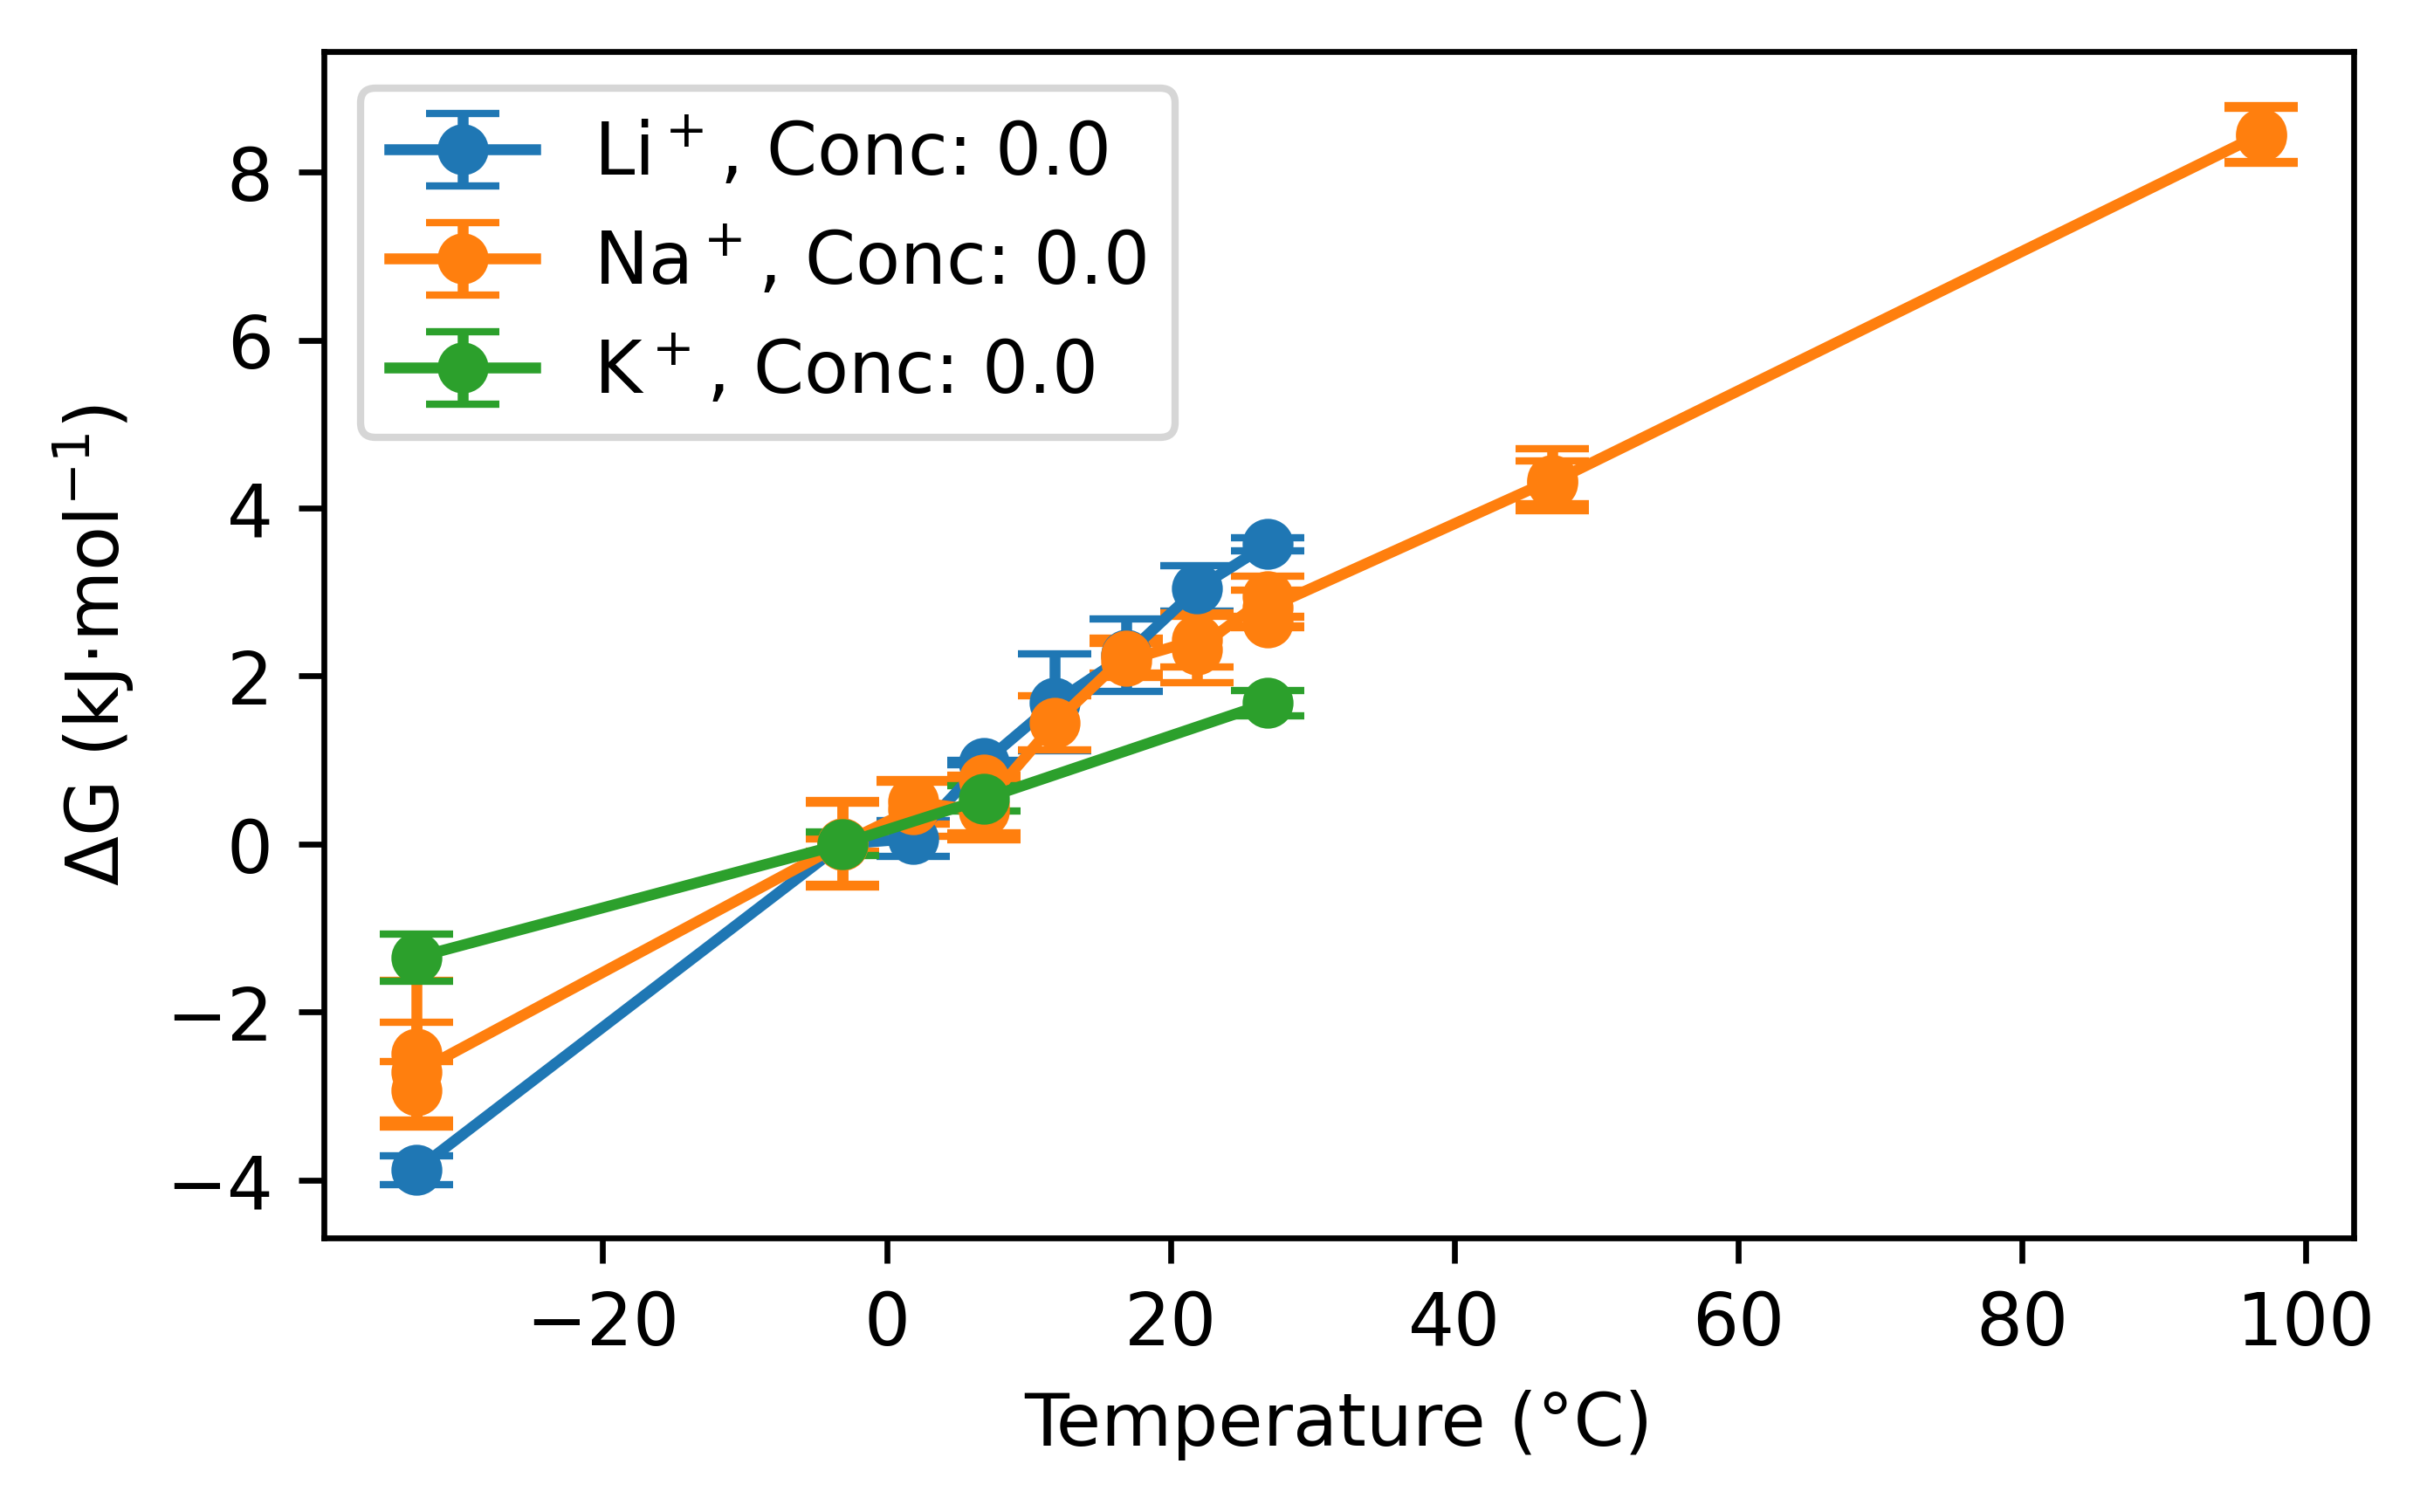

     Cation Anion  Conc   Temp Sim_length    type  for_back  rep    GFET  \
0        Li    Cl   0.0  240.0         10  cation   forward  1.0 -480.93   
1        Li    Cl   0.0  270.0         10  cation   forward  1.0 -477.05   
2        Li    Cl   0.0  280.0         10  cation   forward  1.0 -476.08   
3        Li    Cl   0.0  300.0         10  cation   forward  1.0 -473.48   
8        Na    Cl   0.0  240.0         10  cation   forward  1.0 -373.09   
...     ...   ...   ...    ...        ...     ...       ...  ...     ...   
1144     Na    Cl   0.0  300.0   2_extend  cation  backward  1.0 -367.13   
1145     Na    Cl   0.0  320.0   2_extend  cation   forward  1.0 -365.87   
1146     Na    Cl   0.0  320.0   2_extend  cation  backward  1.0 -365.83   
1147     Na    Cl   0.0  370.0   2_extend  cation   forward  1.0 -361.65   
1148     Na    Cl   0.0  370.0   2_extend  cation  backward  1.0 -361.80   

      GFETerr  ...  CNerr  MRT_fiterr      Avg_S  Avg_Serr AVG STDEV STDERR  \
0       

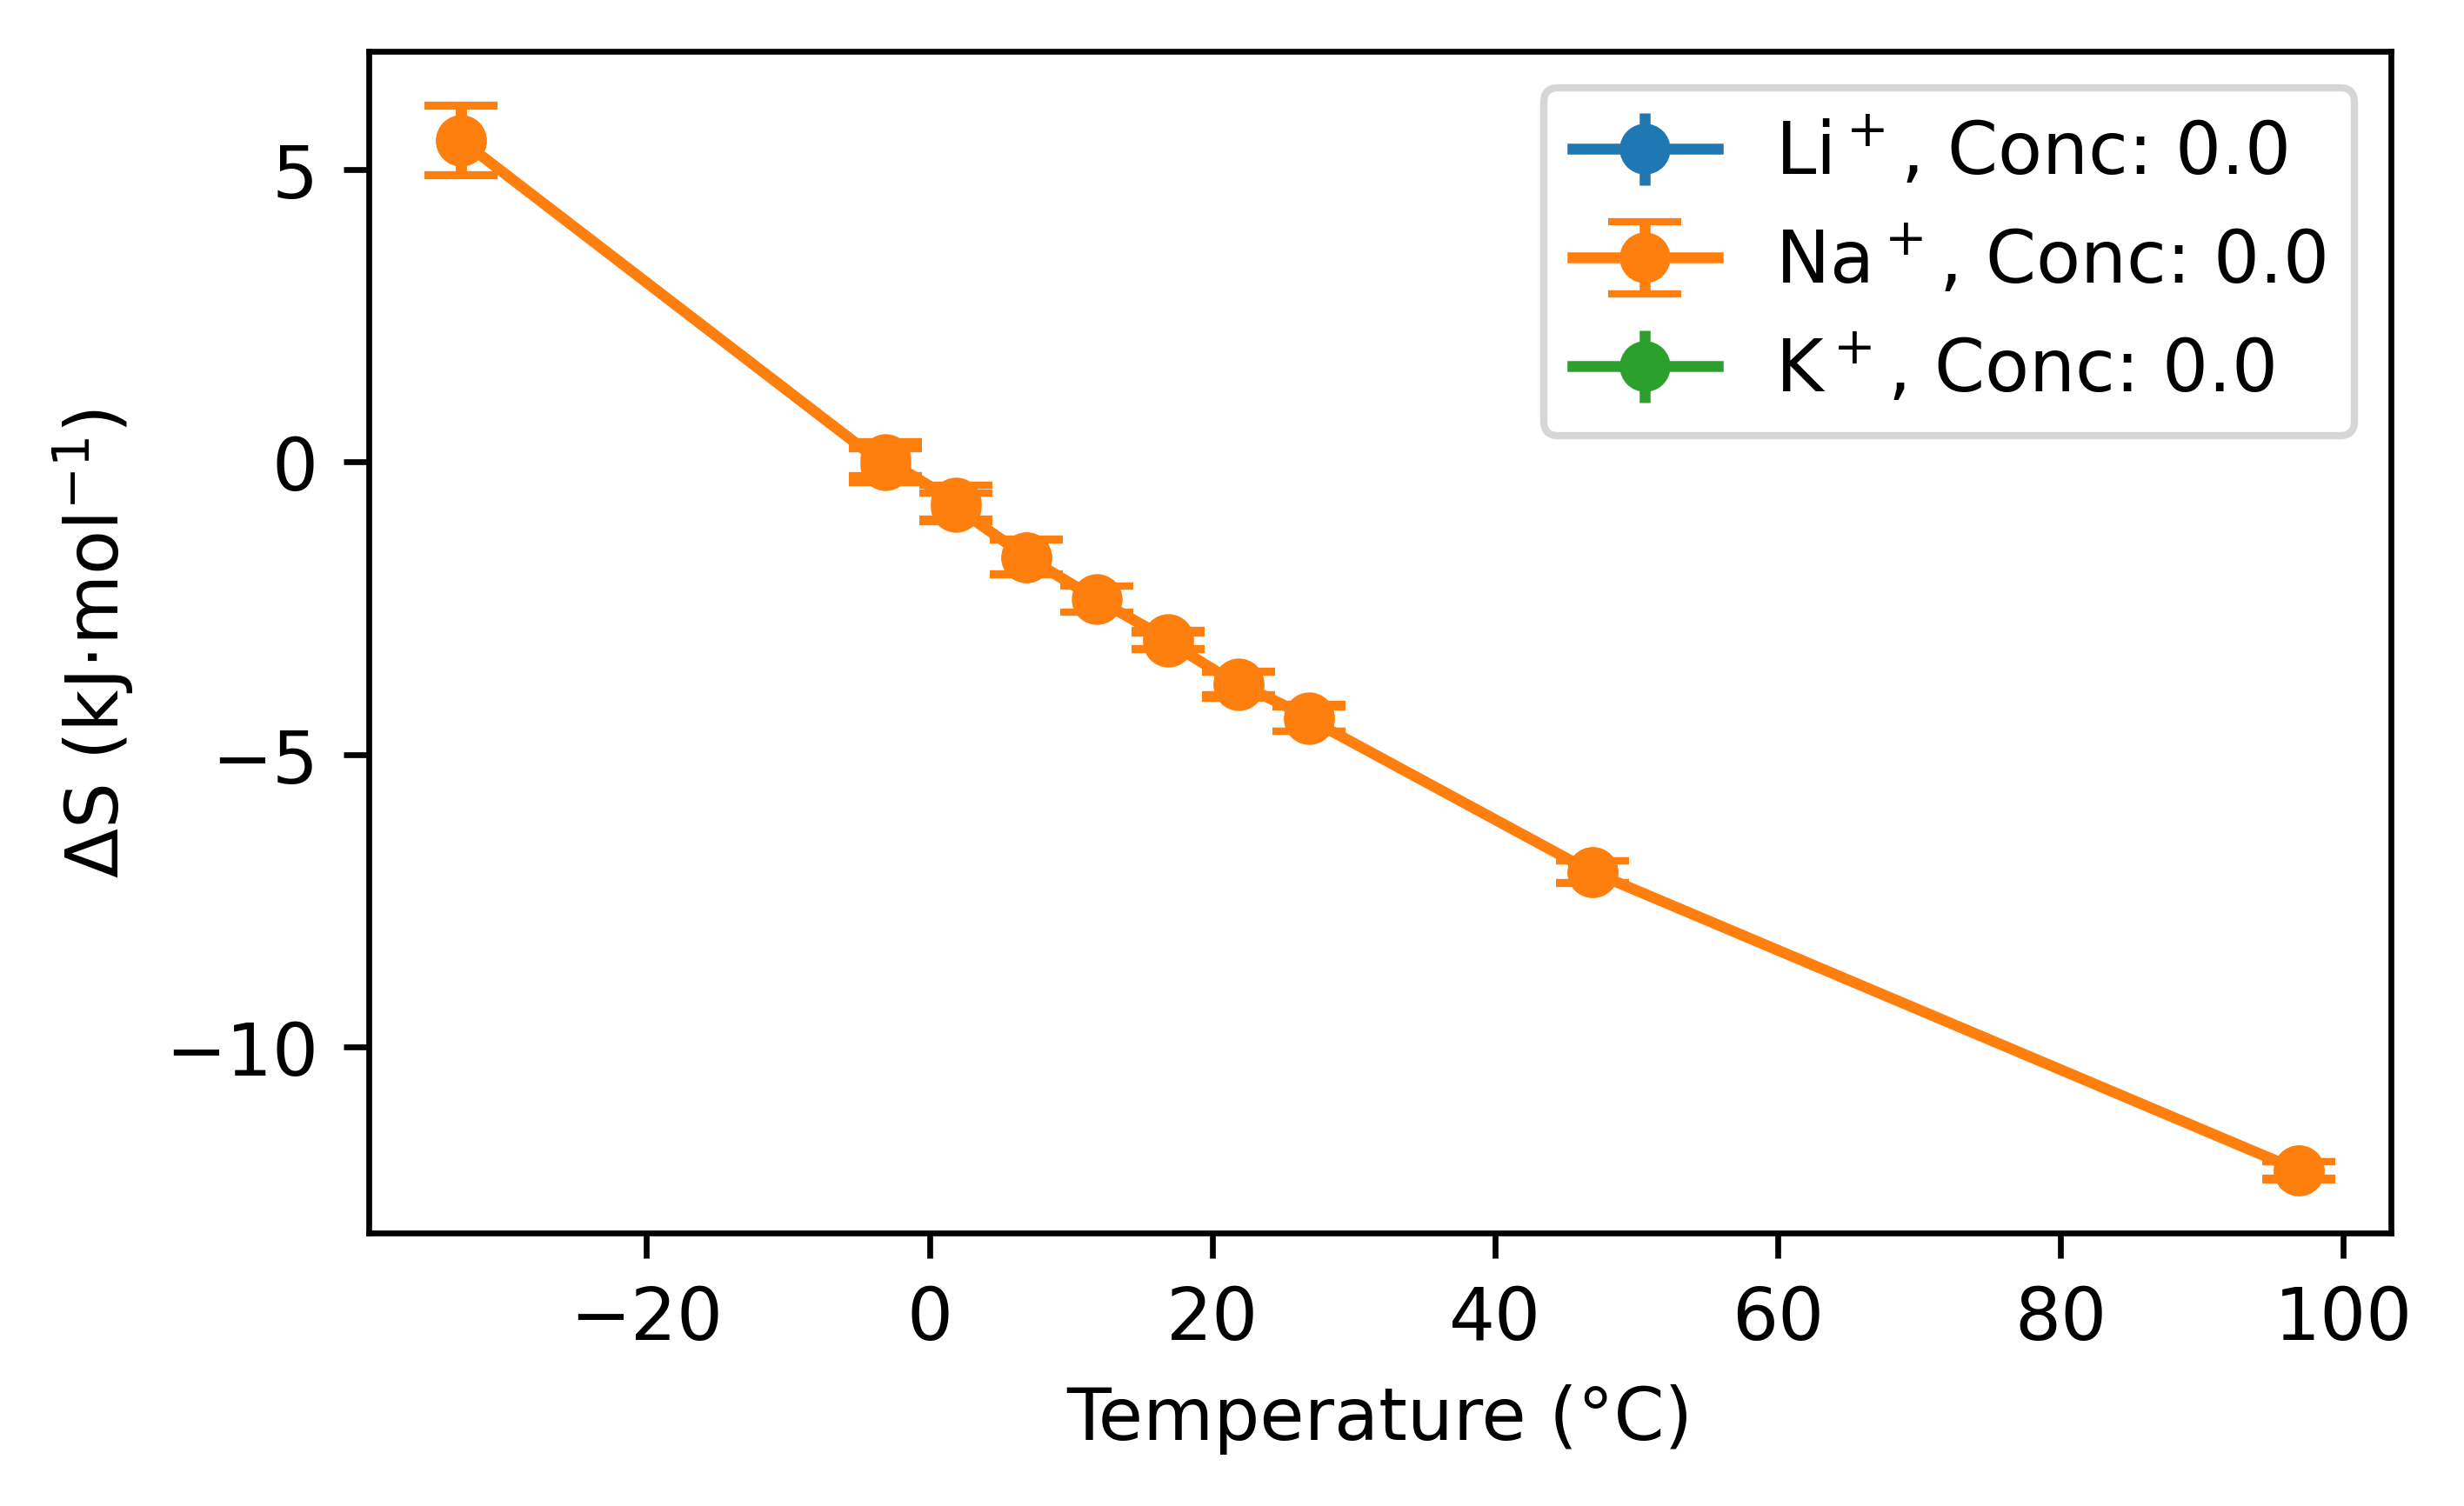

     Cation Anion  Conc   Temp Sim_length    type  for_back  rep    GFET  \
0        Li    Cl   0.0  240.0         10  cation   forward  1.0 -480.93   
1        Li    Cl   0.0  270.0         10  cation   forward  1.0 -477.05   
2        Li    Cl   0.0  280.0         10  cation   forward  1.0 -476.08   
3        Li    Cl   0.0  300.0         10  cation   forward  1.0 -473.48   
8        Na    Cl   0.0  240.0         10  cation   forward  1.0 -373.09   
...     ...   ...   ...    ...        ...     ...       ...  ...     ...   
1144     Na    Cl   0.0  300.0   2_extend  cation  backward  1.0 -367.13   
1145     Na    Cl   0.0  320.0   2_extend  cation   forward  1.0 -365.87   
1146     Na    Cl   0.0  320.0   2_extend  cation  backward  1.0 -365.83   
1147     Na    Cl   0.0  370.0   2_extend  cation   forward  1.0 -361.65   
1148     Na    Cl   0.0  370.0   2_extend  cation  backward  1.0 -361.80   

      GFETerr  ...  CNerr  MRT_fiterr      Avg_S  Avg_Serr AVG STDEV STDERR  \
0       

TypeError: agg function failed [how->mean,dtype->object]

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def filter_data(df, **filters):
    for key, value in filters.items():
        df = df[df[key] == value]
    return df

def plot_trendlines(x, y, label):
        slope, intercept, _, _, _ = linregress(x, y)
        plt.plot(x, slope * x + intercept, label=f'{label}')

    # plt.xlabel(x_column)
    # plt.ylabel(y_column)
    # plt.legend()
    # plt.show()

# def compute_weighted_avg_error_for_forback(sub_df,y_column):
#     forward = sub_df[sub_df['for_back'] == 'forward']
#     backward = sub_df[sub_df['for_back'] == 'backward']

#     if not forward.empty and not backward.empty:
#         gfet_1, gfeterr_1 = forward[y_column].values[0], forward[y_column + 'err'].values[0]
#         gfet_2, gfeterr_2 = backward[y_column].values[0], backward[y_column + 'err'].values[0]

#         if any(np.isnan([gfet_1, gfeterr_1, gfet_2, gfeterr_2])) or any(np.isinf([gfet_1, gfeterr_1, gfet_2, gfeterr_2])):
#             return None, None

#         weighted_avg = (gfet_1/gfeterr_1**2 + gfet_2/gfeterr_2**2) / (1/gfeterr_1**2 + 1/gfeterr_2**2)
#         err_weighted_avg = np.sqrt(1 / (1/gfeterr_1**2 + 1/gfeterr_2**2))

#         return weighted_avg, err_weighted_avg
#     else:
#         return None, None

def compute_weighted_avg_error_for_forback(sub_df, y_column):
    forward = sub_df[sub_df['for_back'] == 'forward']
    backward = sub_df[sub_df['for_back'] == 'backward']

    if not forward.empty and not backward.empty:
        # Both forward and backward data are available
        gfet_1, gfeterr_1 = forward[y_column].values[0], forward[y_column + 'err'].values[0]
        gfet_2, gfeterr_2 = backward[y_column].values[0], backward[y_column + 'err'].values[0]

        if any(np.isnan([gfet_1, gfeterr_1, gfet_2, gfeterr_2])) or any(np.isinf([gfet_1, gfeterr_1, gfet_2, gfeterr_2])):
            return None, None

        weighted_avg = (gfet_1/gfeterr_1**2 + gfet_2/gfeterr_2**2) / (1/gfeterr_1**2 + 1/gfeterr_2**2)
        err_weighted_avg = np.sqrt(1 / (1/gfeterr_1**2 + 1/gfeterr_2**2))
        return weighted_avg, err_weighted_avg

    elif not forward.empty:
        # Only forward data is available
        gfet_1, gfeterr_1 = forward[y_column].values[0], forward[y_column + 'err'].values[0]

        if any(np.isnan([gfet_1, gfeterr_1])) or any(np.isinf([gfet_1, gfeterr_1])):
            return None, None

        weighted_avg = gfet_1 / gfeterr_1**2
        err_weighted_avg = np.sqrt(1 / (1/gfeterr_1**2))
        return weighted_avg, err_weighted_avg

    elif not backward.empty:
        # Only backward data is available
        gfet_2, gfeterr_2 = backward[y_column].values[0], backward[y_column + 'err'].values[0]

        if any(np.isnan([gfet_2, gfeterr_2])) or any(np.isinf([gfet_2, gfeterr_2])):
            return None, None

        weighted_avg = gfet_2 / gfeterr_2**2
        err_weighted_avg = np.sqrt(1 / (1/gfeterr_2**2))
        return weighted_avg, err_weighted_avg

    else:
        # Neither forward nor backward data is available
        return None, None

# def compute_avg_error_for_forback(sub_df,y_column):
#     forward = sub_df[sub_df['for_back'] == 'forward']
#     backward = sub_df[sub_df['for_back'] == 'backward']

#     if not forward.empty and not backward.empty:
#         gfet_1, gfeterr_1 = forward[y_column].values[0], forward[y_column + 'err'].values[0]
#         gfet_2, gfeterr_2 = backward[y_column].values[0], backward[y_column + 'err'].values[0]

#         if any(np.isnan([gfet_1, gfeterr_1, gfet_2, gfeterr_2])) or any(np.isinf([gfet_1, gfeterr_1, gfet_2, gfeterr_2])):
#             return None, None

#         avg= (gfet_1 + gfet_2)/2
#         err_avg=np.sqrt(gfeterr_1**2 + gfeterr_2**2)
#         # weighted_avg = (gfet_1/gfeterr_1**2 + gfet_2/gfeterr_2**2) / (1/gfeterr_1**2 + 1/gfeterr_2**2)
#         # err_weighted_avg = np.sqrt(1 / (1/gfeterr_1**2 + 1/gfeterr_2**2))

#         return avg, err_avg
#     else:
#         return None, None
    
def compute_avg_error_for_forback(sub_df, y_column):
    forward = sub_df[sub_df['for_back'] == 'forward']
    backward = sub_df[sub_df['for_back'] == 'backward']

    if not forward.empty and not backward.empty:
        # Both forward and backward data are available
        gfet_1, gfeterr_1 = forward[y_column].values[0], forward[y_column + 'err'].values[0]
        gfet_2, gfeterr_2 = backward[y_column].values[0], backward[y_column + 'err'].values[0]

        if any(np.isnan([gfet_1, gfeterr_1, gfet_2, gfeterr_2])) or any(np.isinf([gfet_1, gfeterr_1, gfet_2, gfeterr_2])):
            return None, None

        avg = (gfet_1 + gfet_2) / 2
        err_avg = np.sqrt(gfeterr_1**2 + gfeterr_2**2)
        return avg, err_avg

    elif not forward.empty:
        # Only forward data is available
        gfet_1, gfeterr_1 = forward[y_column].values[0], forward[y_column + 'err'].values[0]

        if any(np.isnan([gfet_1, gfeterr_1])) or any(np.isinf([gfet_1, gfeterr_1])):
            return None, None

        return gfet_1, gfeterr_1

    elif not backward.empty:
        # Only backward data is available
        gfet_2, gfeterr_2 = backward[y_column].values[0], backward[y_column + 'err'].values[0]

        if any(np.isnan([gfet_2, gfeterr_2])) or any(np.isinf([gfet_2, gfeterr_2])):
            return None, None

        return gfet_2, gfeterr_2

    else:
        # Neither forward nor backward data is available
        return None, None    

def compute_weighted_avg_for_reps(rep_group,y_column):
    avgs = []
    errs = []

    for _, sub_group in rep_group.groupby('rep'):
        avg, err = compute_weighted_avg_error_for_forback(sub_group,y_column)
        if avg is not None:
            avgs.append(avg)
            errs.append(err)

    if avgs and errs:
        weighted_avg = sum(a/e**2 for a, e in zip(avgs, errs)) / sum(1/e**2 for e in errs)
        err_weighted_avg = np.sqrt(1 / sum(1/e**2 for e in errs))
        return weighted_avg, err_weighted_avg

    return None, None

def compute_avg_for_reps(rep_group,y_column):
    avgs = []
    errs = []

    for _, sub_group in rep_group.groupby('rep'):
        avg, err = compute_avg_error_for_forback(sub_group,y_column)
        if avg is not None:
            avgs.append(avg)
            errs.append(err)

    if avgs and errs:
        avg2 = np.mean(avgs)
        # err_avg = np.sqrt(sum([e**2 for e in errs]))
        non_zero_errs = [e for e in errs if e != 0]
        count_non_zero = len(non_zero_errs)

        if count_non_zero > 0:
            err_avg = np.sqrt(sum(e**2 for e in non_zero_errs)) / count_non_zero
        else:
            err_avg = None  # or whatever value you'd like to use when there are no non-zero elements
        
        if y_column in ['CN','MRT_fit'] :
            err_avg=np.std(avgs)
        return avg2, err_avg

    return None, None



# [rest of your functions remain the same]

def plot_data(filename, x_column, groupby_columns, y_column, cations, anions, **filters):
# def plot_data(filename, x_column, groupby_columns, y_column, cations, **filters):
    df = pd.read_excel(filename)
    df = filter_data(df, **filters)
    # print(df)
    # df = df[df['Temp'] != 240]
    cat_or_an='cation'
    # df = df[df['type'] == 'salt']
    # df = df[df['type'] == 'anion']
    # df = df[df['type'] == 'cation']
    df = df[df['type'] == cat_or_an]
    df = df[df['Conc'] != 6]
    df = df[df['Conc'] != 2]
    df = df[df['Conc'] != 1]
    df = df[df['Conc'] != 0.75]
    df = df[df['Conc'] != 0.3]
    df = df[df['Conc'] != 0.1]
    df = df[df['Conc'] != 0.5]
    # df = df[df['Conc'] != 0]
    # print(df)
    # df = df[df['Sim_length'] == 10 ]
    # print(df)
    # df = df[df['Sim_length'] == '2_extend']
    # df = df[df['Sim_length'] == 2]
    # df = df[df['rep'] == 1 ]
    # [rest of the data preprocessing remains the same]
    print(df)

    # Normalizing GFET to 270 K GFET for each cation-anion pair
    gfet_270k = df[df['Temp'] == 270].groupby(['Cation', 'Anion','Conc'])[y_column].mean()
    df = df.join(gfet_270k, on=['Cation', 'Anion','Conc'], rsuffix='_270K')
    df[f'{y_column}_Normalized'] = df.apply(lambda row: row[y_column] - row[f'{y_column}_270K'], axis=1)

    df[f'{y_column}']=df[f'{y_column}_Normalized'] 

    plt.figure(figsize=(5, 3))
    line_group = 'Temp' if x_column == 'Conc' else 'Conc'
    
    df['Temp'] = df['Temp']-273.13
    
    print("cations=",cations,"anions=",anions)

    for cation in cations:
        filtered_df1 = df[df['Cation'] == cation]
        filtered_df1 = filter_data(filtered_df1, **filters)
        for anion in anions:
            filtered_df = filtered_df1[filtered_df1['Anion'] == anion]
            filtered_df = filter_data(filtered_df, **filters)

    # for anion in anions:
    #     filtered_df = df[df['Anion'] == anion]
    #     filtered_df = filter_data(filtered_df, **filters)
    #     for cation in cations:
    #         filtered_df = filtered_df[filtered_df['Cation'] == cation]
    #         filtered_df = filter_data(filtered_df, **filters)

            print(filtered_df)

            colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_df[line_group].unique())))
            x_index = groupby_columns.index(x_column)
            
            for i, (value, group) in enumerate(filtered_df.groupby(line_group)):
                df_grouped = group.groupby(groupby_columns)
                averages = []
                errors = []
                x_values = []
                
                for name, sub_group in df_grouped:
                    avg, err = compute_avg_for_reps(sub_group,y_column)
                    if avg is not None:
                        averages.append(avg)
                        errors.append(err)
                        x_values.append(name[x_index])
                if cat_or_an == 'anion':
                    plt.errorbar(x_values, averages, yerr=errors, capsize=5, linestyle='-', marker='o', label=f"{anion}$^-$, {line_group}: {value}")
                    
                elif cat_or_an == 'cation':
                    # plt.errorbar(x_values, averages, yerr=errors, capsize=5, linestyle='-', marker='o', label=f"{cation}$^+$, {line_group}: {value}")
                    plot_trendlines(your_dataframe, 'x_data_column', 'y_data_column', 'anion_cation_column')
                elif cat_or_an == 'salt':
                    plt.errorbar(x_values, averages, yerr=errors, capsize=5, linestyle='-', marker='o', label=f"{cation}{anion}, {line_group}: {value}")
                # plt.errorbar(x_values, averages, yerr=errors, capsize=5, linestyle='-', marker='o', label=f"{anion}, {line_group}: {value}")

    if x_column == 'Temp':
        x_label='Temperature (°C)'
    elif x_column == 'Conc':
        x_label='Concentration (M)'
    else:
        x_label=x_column
    
    if y_column == 'GFET':
        y_label='ΔG (kJ⋅mol$^{{-1}}$)'
    elif y_column == 'GFET_Normalised':
        y_label='ΔG$_{T-270K}$ (kJ⋅mol$^{{-1}}$)'
    elif y_column == 'Avg_S':
        y_label='ΔS (kJ⋅mol$^{{-1}}$)'
    else:
        y_label=y_column

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

filename = r'C:\Users\Kas\OneDrive - Australian National University\Postdoctoral Fellowship\Corry Lab\Thermodiffusion\FEP_GROMACS_python4.xlsx'

for i in ['GFET','Avg_S','CN','MRT_fit']:
    # Example of plotting Li and Na on the same graph
    # plot_data(filename, 'Temp', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], i, cations=['Na'], anions=['F','Cl','I'])
    # plot_data(filename, 'Temp', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], i, cations=['Li','Na','K','Rb','Cs','Be','Mg','Ca','Sr','Ba','Al'], anions=['Cl'])
    # plot_data(filename, 'Temp', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], i, cations=['Be','Mg','Ca','Sr','Ba','Al'], anions=['Cl'])
    plot_data(filename, 'Temp', ['Cation', 'Anion', 'Conc', 'Temp', 'Sim_length', 'type'], i, cations=['Li','Na','K'], anions=['Cl'])
